In [79]:
from scipy import stats
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import binom
from scipy.stats import geom
from scipy.stats import hypergeom
from scipy.stats import poisson
from scipy.stats import nbinom
import pandas as pd
import numpy as np
import sympy as sp
from sympy import *
sp.init_printing()

import matplotlib.pyplot as plt
import scipy.integrate as integrate
import scipy.special as special
from scipy.integrate import quad
import numpy as np
from scipy.misc import derivative
import math
from math import *
from fractions import Fraction
import fractions
from sympy import Rational as R
from IPython.display import display, Math, Latex
%matplotlib inline
from IPython.display import Image, HTML
import statsmodels.stats.power as smp

## Problems 7 </br> 
**Book_Chapters ASPE: 9.1-9.3 + 9.5+9.8+10.1-10.4+ 10.6** </br>
ASPE Exercises: **9.3.8 + 9.3.9+9.5.3+9.5.4** </br>
Exam Exercises: **2014.2.c; 2015.3; 2015.4; 2016.4; 2017.5; Reexam 2018.4 (not g)**


## Exercise 1 Book(ASPE: 9.3.8) </br>
Cloud seeding has been studied for many decades as a weather modification procedure (for an interesting study
of this subject, see the article in Technometrics, “A Bayesian Analysis of a Multiplicative Treatment Effect in Weather Modification,” 1975, Vol. 17, pp. 161–166). The rainfall in acre-feet from 20 clouds that were selected at random and seeded with silver nitrate follows: 18.0, 30.7, 19.8, 27.1, 22.3, 18.8, 31.8, 23.4, 21.2, 27.9, 31.9, 27.1, 25.0, 24.7, 26.9, 21.8, 29.2, 34.8, 26.7,and 31.6.

**a) Can you support a claim that mean rainfall from seeded clouds exceeds 25 acre-feet? Use α = 0.01. Find the P-value.**
</br>
**Testing Hypotheses on the Mean of a Normal Distribution, Variance Unknown**</br>
**1.Parameter of interest:The parameter of interest is the mean coefficient of restitution, μ.**</br >
**2.Null Hypothesis: $H_0: \mu =25$** </br>
**3.Alternative Hypothesis: $H_1: > 25$** We want to reject $H_0$ if the mean rainfall from seeded clouds exceeds 25 acre-feet </br>
**4.Test statistic: The test statistic is $t_0=\frac {\overline{x}-\mu_{0}}{\frac{S}{\sqrt{n}}}$** </br>
**5.Reject $H_0$ if: $t_0>t_{0.01,19}$ where $\alpha$=0.01 and $t_{\frac{0.01}{2},19}=2.539$ for n=20** </br>
**6.Computations: Reject $H_0$ if the P-value is less than 0.01** </br>

In [16]:
a =[ 18.0, 30.7, 19.8, 27.1, 22.3, 18.8, 31.8, 23.4, 21.2, 27.9, 31.9, 27.1, 25.0, 24.7, 26.9, 21.8, 29.2, 34.8, 26.7, 31.6 ]
alpha = 0.01
sample_size = len(a)
sample_mean = np.mean(a)
sample_standard_deviation = np.std(a)## small s
hypothesis_mean = 25 ## null hypothesiss

## carefully this is a right sided test hence interval we are looking at is 1-alpha, not 1-alpha/2
ddof = sample_size-1
t_crit_ddof = stats.t.ppf(1-alpha,ddof)
display(Math('t_{\\frac{0.01}{2},19}='+latex(round(t_crit_ddof,3))))

test_statistic_hypothesis = (sample_mean-hypothesis_mean)/( sample_standard_deviation/np.sqrt(sample_size))
display(Math( 't_{0}='+ latex(round(test_statistic_hypothesis,2))))

## notice we are using sf function, alternative use 1-cdf
p_value = t.sf(np.abs(test_statistic_hypothesis), sample_size-1)
display(Math('P-value='+ latex(round(p_value,3))))

print('7. Conclusions:  From t-score table we find for a t distribution with 19 degrees of freedom that t0 = 0.99 \n falls between two values: 0.688, for which α = 0.250, and 1.187, for which α = 0.125. \n Because this is a one-tailed test, we know that the P-value is between those two values, that is, 0.125 < P < 0.250. \n Therefore, because P > 0.01, we fail to reject H0 and conclude that the true mean rainfall is greater than 25 acre-feet at alpha = 0.01')


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

7. Conclusions:  From t-score table we find for a t distribution with 19 degrees of freedom that t0 = 0.99 
 falls between two values: 0.688, for which α = 0.250, and 1.187, for which α = 0.125. 
 Because this is a one-tailed test, we know that the P-value is between those two values, that is, 0.125 < P < 0.250. 
 Therefore, because P > 0.01, we fail to reject H0 and conclude that the true mean rainfall is greater than 25 acre-feet at alpha = 0.01


**b) Check that rainfall is normally distributed.**</br>

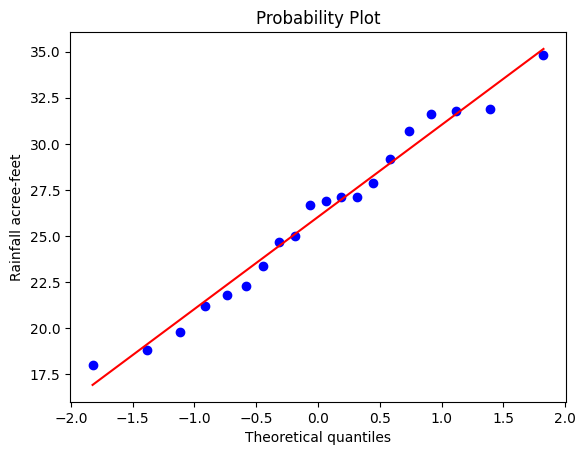

Data falls along normal line, this results in the fact that the data is normally distributed.


In [82]:
a =[ 18.0, 30.7, 19.8, 27.1, 22.3, 18.8, 31.8, 23.4, 21.2, 27.9, 31.9, 27.1, 25.0, 24.7, 26.9, 21.8, 29.2, 34.8, 26.7, 31.6 ]

stats.probplot(a, plot=plt)
plt.ylabel('Rainfall acree-feet')
plt.show()
print('Data falls along normal line, this results in the fact that the data is normally distributed.')

**c) Compute the power of the test if the true mean rainfall is 27 acre-feet.**</br>
In this example we will use the Operating Characteristic curve to calculate the $\beta$ (probability of making type 2 error) at $\alpha$= 0.01 (significance level,probability of making type 1 error) with formula: </br>
$d=\frac{\delta}{\sigma}=\frac{|\mu - \mu_{0}|}{\sigma}$ (population mean difference) </br>
$\alpha$ = 0.01 </br>
USE python function to compute $\beta$ </br>
To calculate the Power(The power of a statistical test is the probability of rejecting the null hypothesis H0 when the
alternative hypothesis is true): power = (1-$\beta$) </br>



In [244]:
a =[ 18.0, 30.7, 19.8, 27.1, 22.3, 18.8, 31.8, 23.4, 21.2, 27.9, 31.9, 27.1, 25.0, 24.7, 26.9, 21.8, 29.2, 34.8, 26.7, 31.6 ]

alpha = 0.01
sample_size = len(a)
sample_standard_deviation = np.std(a)## small s
hypothesis_mean = 25 ## null hypothesiss
true_mean = 27


## Solution with OC curve using d, DID NOT get to the right answer !!!!!

population_mean_difference = abs(true_mean-hypothesis_mean)/  sample_standard_deviation  ## d

### Found this solution on the internet
## this one can probably be solved differently reffer to the book page 213
power = smp.tt_solve_power(effect_size=population_mean_difference, nobs=sample_size, alpha=alpha)
beta = 1 - power
## the rounding sucks
print('beta '+latex(round(beta,2)))
print('power '+latex(round(power,2)))


beta 0.79
power 0.21


**d)** What sample size would be required to detect a true mean rainfall of 27.5 acre-feet if you wanted the power of the test to be at least 0.9? </br>

In [ ]:
a =[ 18.0, 30.7, 19.8, 27.1, 22.3, 18.8, 31.8, 23.4, 21.2, 27.9, 31.9, 27.1, 25.0, 24.7, 26.9, 21.8, 29.2, 34.8, 26.7, 31.6 ]

alpha = 0.01
sample_size = len(a)
sample_standard_deviation = np.std(a)## small s
hypothesis_mean = 25 ## null hypothesiss
true_mean = 27.5

## Solution with OC curve using d, DID NOT get to the right answer !!!!!

population_mean_difference = abs(true_mean-hypothesis_mean)/  sample_standard_deviation  ## d

### Found this solution on the internet
power_analysis = TTestIndPower()
beta = power_analysis.solve_power(effect_size=population_mean_difference, nobs1=sample_size, alpha=alpha, alternative='larger')


## My solution, not sure about this one as well
test_statistic_hypothesis = (true_mean-hypothesis_mean)/( sample_standard_deviation/np.sqrt(sample_size))
display(Math( 't_{0}='+ latex(round(test_statistic_hypothesis,2))))
print("t_0 is "+latex(test_statistic_hypothesis) +" which from the t score distribution is between alpha =0.05 and 0.025, which is equivalent of 1.729<t_0<2.093")

## carefully this is a right sided test hence interval we are looking at is 1-alpha, not 1-alpha/2
ddof = sample_size-1
t_crit_ddof_1 = stats.t.ppf(1-0.05,ddof)
t_crit_ddof_2 = stats.t.ppf(1-0.025,ddof)
display(Math( 'Power='+ latex(round(t_crit_ddof_2-t_crit_ddof_1,2))))

**e)** Explain how the question in part (a) could be answered by constructing a one-sided confidence bound on the mean
diameter. </br>
Because the alternative H_1 hypothesys states, we have to fail to reject that $\mu$ >25, so to prove the alternative </br> hypothesis we have to calculate the lower 99% confidence bound.</br>
Calculate this: </br>
$\overline{x}- t_{1-\alpha,n-1}* \frac{s}{\sqrt{n}} \leq \mu$

In [198]:
a =[ 18.0, 30.7, 19.8, 27.1, 22.3, 18.8, 31.8, 23.4, 21.2, 27.9, 31.9, 27.1, 25.0, 24.7, 26.9, 21.8, 29.2, 34.8, 26.7, 31.6 ]

sample_size = len(a)
sample_standard_deviation = np.std(a)## small s
level_of_confidence = 0.99
sample_mean = np.mean(a)

SE = sample_standard_deviation/np.sqrt(sample_size)

## carefully this is a right sided test hence interval we are looking at is 1-alpha, not 1-alpha/2
ddof = sample_size-1
t_crit_ddof = stats.t.ppf(1-level_of_confidence,ddof)
display(Math('t_{\\frac{0.01}{2},19}='+latex(round(t_crit_ddof,3))))

CI = norm.interval(level_of_confidence, loc=sample_mean, scale=SE)

print('A ' + repr(level_of_confidence*100) + ' % lower confidence interval for the sample mean is '+ repr(round(CI[0],3)) + ' < \u03bc ')
print("Since the lower limit of the CI is less than 25 there is insufficient evidence \n to conclude that the true mean rainfall is greater than 25 acre-feet at = 0.01")

<IPython.core.display.Math object>

A 99.0 % lower confidence interval for the sample mean is 23.349 < μ 
Since the lower limit of the CI is less than 25 there is insufficient evidence 
 to conclude that the true mean rainfall is greater than 25 acre-feet at = 0.01


## Exercise 2 Book(ASPE: 9.3.9) </br>
A 1992 article in the Journal of the American Medical Association (“A Critical Appraisal of 98.6 Degrees F, the Upper Limit of the Normal Body Temperature, and Other Legacies of Carl Reinhold August Wunderlich”) reported body temperature, gender, and heart rate for a number of subjects. The body temperatures for 25 female subjects follow: 97.8, 97.2,
97.4, 97.6, 97.8, 97.9, 98.0, 98.0, 98.0, 98.1, 98.2, 98.3, 98.3, 98.4, 98.4, 98.4, 98.5, 98.6, 98.6, 98.7, 98.8, 98.8, 98.9, 98.9, and 99.0.

**a)** Test the hypothesis H0 : μ = 98.6 versus H1 : μ ≠ 98.6, using α = 0.05. Find the P-value. </br>
**Testing Hypotheses on the Mean of a Normal Distribution, Variance Unknown**</br>
**1.Parameter of interest:The parameter of interest is the mean coefficient of restitution, μ.**</br >
**2.Null Hypothesis: $H_0: \mu =98.6$** </br>
**3.Alternative Hypothesis: $H_1: \mu \neq 98.6$** We want to reject $H_0$ if the mean body temperatures not equals 98.6 Degrees F</br>
**4.Test statistic: The test statistic is $t_0=\frac {\overline{x}-\mu_{0}}{\frac{S}{\sqrt{n}}}$** </br>
**5.Reject $H_0$ if: $|t_0| > t_{\frac{0.05}{2},24}$ where $\alpha$=0.05 and $t_{\frac{0.05}{2},24}=2.064$ for n=25** </br>
**6.Computations: Reject $H_0$ if the P-value is bigger than 0.05** </br>

In [167]:
a =[ 97.8, 97.2,
97.4, 97.6, 97.8, 97.9, 98.0, 98.0, 98.0, 98.1, 98.2, 98.3, 98.3,
98.4, 98.4, 98.4, 98.5, 98.6, 98.6, 98.7, 98.8, 98.8, 98.9, 98.9, 99.0 ]
alpha = 0.05
sample_size = len(a)
sample_mean = np.mean(a)
sample_standard_deviation = np.std(a)## small s
hypothesis_mean = 98.6 ## null hypothesiss

## carefully this is a right sided test hence interval we are looking at is 1-alpha, not 1-alpha/2
ddof = sample_size-1
t_crit_ddof = stats.t.ppf(1-alpha/2,ddof)
display(Math('t_{\\frac{0.01}{2},19}='+latex(round(t_crit_ddof,3))))

test_statistic_hypothesis = (sample_mean-hypothesis_mean)/( sample_standard_deviation/np.sqrt(sample_size))
display(Math( 't_{0}='+ latex(round(test_statistic_hypothesis,2))))

## notice we are using sf function, alternative use 1-cdf
## additionally this is a one sided tail test, so to test 
p_value = 2*t.sf(np.abs(test_statistic_hypothesis), sample_size-1)
display(Math( 'P-value='+ latex(round(p_value,3))))

print('7. Conclusions:  From t-score table we find for a t distribution with 24 degrees of freedom that t0 = 3.56 \n falls between two values: 3.467, for which α = 0.001, and 3.745, for which α = 0.0005. \n As this is a two-tailed test, we know that the P-value is between those two values, that is, 0.0005 < P < 0.001. \n Therefore, because P > 0.0025, because alpha/2, we  reject H0 and conclude \n that the true mean of females body temperature  differs from 98.6 at alpha= 0.05')

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

7. Conclusions:  From t-score table we find for a t distribution with 24 degrees of freedom that t0 = 3.56 
 falls between two values: 3.467, for which α = 0.001, and 3.745, for which α = 0.0005. 
 As this is a two-tailed test, we know that the P-value is between those two values, that is, 0.0005 < P < 0.001. 
 Therefore, because P > 0.0025, because alpha/2, we  reject H0 and conclude 
 that the true mean of females body temperature  differs from 98.6 at alpha= 0.05


**b)** Check the assumption that female body temperature is normally distributed.

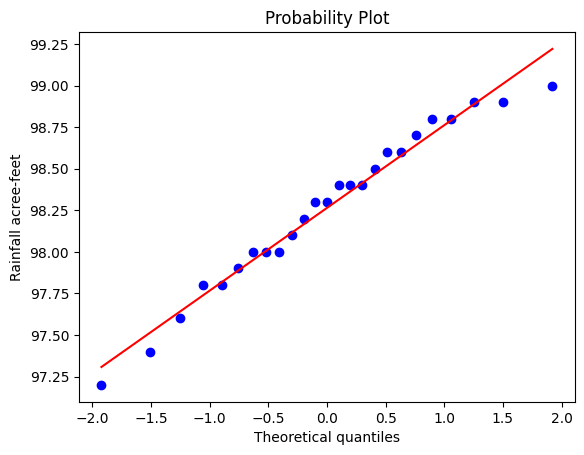

Data falls along normal line, this results in the fact that the data is normally distributed.


In [168]:
a =[ 97.8, 97.2,
97.4, 97.6, 97.8, 97.9, 98.0, 98.0, 98.0, 98.1, 98.2, 98.3, 98.3,
98.4, 98.4, 98.4, 98.5, 98.6, 98.6, 98.7, 98.8, 98.8, 98.9, 98.9, 99.0 ]

stats.probplot(a, plot=plt)
plt.ylabel('Rainfall acree-feet')
plt.show()
print('Data falls along normal line, this results in the fact that the data is normally distributed.')

**c)** Compute the power of the test if the true mean female body temperature is as low as 98.0.

In [220]:
a =[97.8, 97.2,97.4, 97.6, 97.8, 97.9, 98.0, 98.0, 98.0, 98.1, 98.2, 98.3, 98.3, 98.4, 98.4, 98.4, 98.5, 98.6, 98.6, 98.7, 98.8, 98.8, 98.9, 98.9, 99.0]

alpha = 0.05
sample_size = len(a)
sample_standard_deviation = np.std(a)## small s
hypothesis_mean = 98.6 ## null hypothesiss
true_mean = 98

## Solution with OC curve using d, DID NOT get to the right answer !!!!!
## this one can probably be solved differently reffer to the book page 213
population_mean_difference = abs(true_mean-hypothesis_mean)/  sample_standard_deviation  ## Cohen's d effect size

### Found this solution on the internet
power = smp.tt_solve_power(effect_size=population_mean_difference, nobs=sample_size, alpha=alpha)
beta = 1 - power
print('beta '+latex(round(beta)))
print('power '+latex(round(power)))

beta 0
power 1


**d)** What sample size would be required to detect a true mean female body temperature as low as 98.2 if you wanted the power of the test to be at least 0.9?

In [236]:
a =[97.8, 97.2,97.4, 97.6, 97.8, 97.9, 98.0, 98.0, 98.0, 98.1, 98.2, 98.3, 98.3, 98.4, 98.4, 98.4, 98.5, 98.6, 98.6, 98.7, 98.8, 98.8, 98.9, 98.9, 99.0]

alpha = 0.05
sample_size = len(a)
sample_standard_deviation = np.std(a)## small s
hypothesis_mean = 98.6 ## null hypothesiss
true_mean = 98.2

## Solution with OC curve using d, DID NOT get to the right answer !!!!!
## this one can probably be solved differently reffer to the book page 213
population_mean_difference = abs(true_mean-hypothesis_mean)/  sample_standard_deviation  ## Cohen's d effect size
print(population_mean_difference)

### Found this solution on the internet
power = smp.tt_solve_power(effect_size=population_mean_difference, nobs=sample_size, alpha=alpha)
beta = 1 - power
print('beta '+latex(round(beta,3)))
print('power '+latex(round(power,2)))

0.8468496511259435
beta 0.018
power 0.98


## Exercise 3 Book(ASPE: 9.5.3) </br>
An article in the British Medical Journal [“Comparison of Treatment of Renal Calculi by Operative Surgery, Percutaneous Nephrolithotomy, and Extra-Corporeal Shock Wave Lithotripsy” (1986, Vol. 292, pp. 879–882)] repeated that percutaneous nephrolithotomy (PN) had a success rate in removing kidney stones of 289 of 350 patients. The traditional method was 78% effective.

**a)** Is there evidence that the success rate for PN is greater than the historical success rate? Find the P-value.</br>
**Testing Hypotheses on a Binomial Proportion**</br>
**1.Parameter of interest:The parameter of interest is the succcess rate.**</br >
**2.Null Hypothesis: $H_0: p = 0.78$** </br>
**3.Alternative Hypothesis: $H_1: p > 0.78$** We want to reject $H_0$ if the succcess rate of removing kindney stones is higher than 78 percents</br>
**4.Test statistic: The test statistic is $z_0=\frac {X-n*p_{0}}{ \sqrt{n*p_{0}*(1-p_0)}}$** or $z_0=\frac {\overline{p}-p_{0}}{ \sqrt{\frac{p_{0}*(1-p_{0})}{n}}}$ </br>
**5.Reject $H_0$ if: $|Z_0| > Z_{0.05}$, assume  $\alpha$=0.05 and $z_{\alpha}=z_{0.05}=1.65$ for n=350** </br>
**6.Computations: Reject $H_0$ if the true succes rate is bigger than the hypothesed one at 0.05, or the P-value is less than 0.05** </br>

In [27]:

alpha = 0.05
sample_size = 289
population_size = 350
proportion = sample_size/population_size
hypothesis_rate = 0.78 ## null hypothesiss

## carefully this is a right sided test hence interval we are looking at is 1-alpha, not 1-alpha/2
z_crit = stats.norm.ppf(1-alpha)
display(Math('z_{0.05}='+latex(round(z_crit,3))))

test_statistic_hypothesis = (proportion-hypothesis_rate)/np.sqrt((hypothesis_rate*(1-hypothesis_rate)) / population_size)
display(Math( 'z_{0}='+ latex(round(test_statistic_hypothesis,2))))

## notice we are using sf function, alternative use 1-cdf
## additionally this is a one sided tail test, so to test 
p_value = norm.sf(np.abs(test_statistic_hypothesis))
display(Math( 'P-value='+ latex(round(p_value,4))))

print('7. Conclusions:  From z-score table we find for a normal distribution with z0 = 2.06 \n which is bigger than z_crit = 1.645. \n Therefore we reject the H_0 hypothesis and conclude that true success rate is greater than 0.78, at alpha = 0.05.')

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

7. Conclusions:  From z-score table we find for a normal distribution with z0 = 2.06 
 which is bigger than z_crit = 1.645. 
 Therefore we reject the H_0 hypothesis and conclude that true success rate is greater than 0.78, at alpha = 0.05.


**b)** Explain how the question in part (a) could be answered with a confidence interval</br>
Because the alternative H_1 hypothesys states, we have to fail to reject that success rate > 78 percents, so to prove the alternative </br> hypothesis we have to calculate the lower 95% confidence bound.</br>
Calculate this: </br>
$\overline{p}- z_{\alpha}* \sqrt{\frac{\overline{p}*(1-\overline{p})}{n}} \leq p$

In [56]:
alpha = 0.05
sample_size = 289
population_size = 350
## carefullly this is rounded
proportion = round(sample_size/population_size,2)
hypothesis_rate = 0.78 ## null hypothesiss
level_of_confidence = 0.95

SE = proportion/np.sqrt(sample_size)

## carefully this is a one sided test hence interval we are looking at is 1-alpha, not 1-alpha/2
## carefullly this is rounded
## take the abs value !!!!!
z_crit = abs(round(stats.norm.ppf(1-level_of_confidence),3))
display(Math('z_{0.05}=|'+latex(z_crit)+"|"))

CI= proportion - z_crit*np.sqrt(proportion*(1-proportion)/population_size)

print('A ' + repr(level_of_confidence*100) + ' % lower confidence interval for the success rate is '+ repr(round(CI,3)) + ' < p')
print("Since the lower limit of the CI with 0.95 level confidence is bigger than the null hypothesis , we reject the null hypothesys , 0.78< 0.797 rainfall is greater than 25 acre-feet at alpha= 0.01")

<IPython.core.display.Math object>

A 95.0 % lower confidence interval for the success rate is 0.797 < p
Since the lower limit of the CI with 0.95 level confidence is bigger than the null hypothesis , we reject the null hypothesys , 0.78< 0.797 rainfall is greater than 25 acre-feet at alpha= 0.01


## Exercise 4 Book(ASPE: 9.5.4) </br>
An article in Fortune (September 21, 1992) claimed that nearly one-half of all engineers continue academic studies beyond the B.S. degree, ultimately receiving either an M.S. or a Ph.D. degree. Data from an article in Engineering Horizons (Spring 1990) indicated that 117 of 484 new engineering graduates were planning graduate study </br>

**a)** Are the data from Engineering Horizons consistent with the claim reported by Fortune? Use α = 0.05 in reaching your conclusions.</br >
Find the P-value for this test</br>
**Testing Hypotheses on a Binomial Proportion**</br>
**1.Parameter of interest:The parameter of interest is students planning graduate studies**</br >
**2.Null Hypothesis: $H_0: p =0.50$** </br>
**3.Alternative Hypothesis: $H_1: p \neq 0.50$** We want to reject $H_0$ if the true proportion of students differs from 0.50, at $\alpha=0.05$ </br>
**4.Test statistic: The test statistic is $z_0=\frac {X-n*p_{0}}{ \sqrt{n*p_{0}*(1-p_0)}}$** or $z_0=\frac {\overline{p}-p_{0}}{ \sqrt{\frac{p_{0}*(1-p_{0})}{n}}}$ </br>
**5.Reject $H_0$ if: $|Z_0| > Z_{0.05}$, assume  $\alpha$=0.05 and $z_{\alpha}=z_{0.05}=1.65$ for n=484** </br>
**6.Computations: Reject $H_0$ if the true succes rate is bigger than the hypothesed one at 0.05, or the P-value is less than 0.05** </br>

In [14]:

alpha = 0.05
sample_size = 117
population_size = 484
proportion = sample_size/population_size
hypothesis_rate = 0.50 ## null hypothesiss

## carefully this is a one sided test hence interval we are looking at is 1-alpha, not 1-alpha/2
##carefully this 
z_crit = stats.norm.ppf(1-alpha)
display(Math('z_{0.05}='+latex(round(z_crit,3))))

test_statistic_hypothesis = (proportion-hypothesis_rate)/np.sqrt((hypothesis_rate*(1-hypothesis_rate)) / population_size)
display(Math( 'z_{0}='+ latex(round(test_statistic_hypothesis,2))))

## notice we are using sf function, alternative use 1-cdf
## additionally this is a one sided tail test, so to test 
p_value = norm.sf(np.abs(test_statistic_hypothesis))
display(Math( 'P-value='+ latex(round(p_value,3))))

print('7. Conclusions:  From z-score table we find for a normal distribution with z0 = 2.06 \n which is bigger than z_crit = 1.645. \n Therefore we reject the H_0 hypothesis and conclude that true success rate is greater than 0.78, at alpha = 0.05.')

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

7. Conclusions:  From z-score table we find for a normal distribution with z0 = 2.06 
 which is bigger than z_crit = 1.645. 
 Therefore we reject the H_0 hypothesis and conclude that true success rate is greater than 0.78, at alpha = 0.05.


**b)** Discuss how you could have answered the question in part (a) by constructing a two-sided confidence interval on p.</br >
Because the alternative H_1 hypothesys states, we have to reject that sdiffers 0.5 percents, so to prove the alternative </br> hypothesis we have to calculate the two-side 95% confidence bound.</br>
Calculate this: </br>
$\overline{p}- z_{\alpha}* \sqrt{\frac{\overline{p}*(1-\overline{p})}{n}} \leq p \leq \overline{p}+ z_{\alpha}* \sqrt{\frac{\overline{p}*(1-\overline{p})}{n}}$

In [72]:
alpha = 0.05
sample_size = 117
population_size = 489
## carefullly this is rounded
proportion = round(sample_size/population_size,2)
hypothesis_rate = 0.50 ## null hypothesiss
level_of_confidence = 0.90

SE = proportion/np.sqrt(sample_size)

## carefully this is a one sided test hence interval we are looking at is 1-alpha, not 1-alpha/2
## carefullly this is rounded
## take the abs value !!!!!
z_crit = abs(round(stats.norm.ppf(level_of_confidence/2),3))
display(Math('z_{0.05}=|'+latex(z_crit)+"|"))

CI_lower = proportion - z_crit*np.sqrt(proportion*(1-proportion)/population_size)

CI_upper= proportion + z_crit*np.sqrt(proportion*(1-proportion)/population_size)

print('A ' + repr(level_of_confidence*100) + ' % confidence interval for the success rate is '+ repr(round(CI_lower,3)) + ' < p <'+ repr(round(CI_upper,3)) +"]" )
print("Since the lower limit of the CI with 0.95 level confidence is bigger than the null hypothesis , we reject the null hypothesys , 0.78< 0.797 rainfall is greater than 25 acre-feet at alpha= 0.01")

<IPython.core.display.Math object>

A 90.0 % confidence interval for the success rate is 0.238 < p <0.242]
Since the lower limit of the CI with 0.95 level confidence is bigger than the null hypothesis , we reject the null hypothesys , 0.78< 0.797 rainfall is greater than 25 acre-feet at alpha= 0.01


## Exam 2014 Assignment 2 (c)
An IT company receives its printed circuit boards from two different suppliers, 1 and 2. Records show that 5% of the circuit boards from supplier 1 and 3% of the circuit boards from supplier 2 are defective. 60% of the company’s current circuit boards come from supplier 2, and the remaining from supplier 1. The company usually keeps a stock of 2000 circuit boards

**a)** Based on this information, construct a contingency table of the company’s circuit board stock </br>


In [26]:
## Index 1 = Supplier 1
## Index 2 = Supplier 2
## Index 3 = Total

## Column 1 = Defective
## Column 2 = Non-defective
## Column 3 = Total
Index = [1, 2, 3]
Columns = {1: [40, 36, 76], 2: [760, 1164, 1924], 3: [800,1200,2000]}
df = pd.DataFrame(data=Columns, index = Index)
df

,1,2,3
1,40,760,800
2,36,1164,1200
3,76,1924,2000


**Book Example Page 233**

In [57]:
observed = np.array([[160, 40], [ 140, 60], [40, 60]])
test_statistic = stats.chi2_contingency(observed)

crit_value_alpha = 0.05
ddof = test_statistic[2]
critical_value = stats.chi2.ppf(1-alpha,ddof)

print("Critical value", critical_value)

print("Chi-square statistic:", test_statistic[0])
print("P-value:", test_statistic[1])
print("Degrees of freedom:", test_statistic[2])
print("Expected frequencies:\n", test_statistic[3])


Critical value 5.991464547107979
Chi-square statistic: 49.63235294117647
P-value: 1.6690582619123915e-11
Degrees of freedom: 2
Expected frequencies:
 [[136.  64.]
 [136.  64.]
 [ 68.  32.]]


**c)** Is there sufficient evidence to support the claim that the rate of defectives depends very significantly on supplier? 
</br>
**Tests on the Difference in Means of Two Normal Distributions, Variances Unknown and Equal**</br>
**1.Parameter of interest:The parameter of interest is the mean coefficient of restitution, μ.**</br >
**2.Null Hypothesis: $H_0$: Defectives rate are independent from the supplier** </br>
**3.Alternative Hypothesis: $H_1$: Defectives rate are dependent from the supplier** </br>
**4.Test statistic: $\chi_{0}^2= \sum_{i=1}^2 \sum_{j=1}^3 \frac{O_{ij-E_{ij}}}{E_{ij}}$**</br>
**5.Reject $H_0$ if: We will use a fixed-significance level test with α = 0.05. Therefore, because r = 2 and c = 2,
the degrees of freedom for chi-square are (r − 1)(c − 1)= (1)(1) = 1, and we would reject $H_0$ if $\chi_{0}^2=\chi_{0.05,2}^2=5.99$** </br>
**6.Computations: Reject $H_0$ if the P-value is bigger than 0.05** </br>

In [59]:
Columns = {1: [40, 36, 76], 2: [760, 1164, 1924], 3: [800,1200,2000]}

observed = np.array([[40, 36], [ 760, 1164]])
test_statistic = stats.chi2_contingency(observed)

crit_value_alpha = 0.05
ddof = test_statistic[2]
critical_value = stats.chi2.ppf(1-alpha,ddof)

print("Critical value", critical_value)

print("Chi-square statistic:", test_statistic[0])
print("P-value:", test_statistic[1])
print("Degrees of freedom:", test_statistic[2])
print("Expected frequencies:\n", test_statistic[3])

Critical value 3.841458820694124
Chi-square statistic: 4.719357515410149
P-value: 0.029824884837618415
Degrees of freedom: 1
Expected frequencies:
 [[  30.4   45.6]
 [ 769.6 1154.4]]


## Exam 2015 Assignment 3
A computer scientist is investigating the usefulness of two different design languages in improving programming tasks. Twelve expert programmers, familiar with both languages, are asked to code a standard function in both languages, and the time (in minutes) is recorded. The data follows below </br>

**a)** Determine the mean, standard deviation and interquartile range for both sets of data </br>


In [70]:
design_language_1 = [17,16,21,14,18,24,16,14,21,23,13,18]
design_language_2 = [18,14,19,11,23,21,10,13,19,24,15,20]

## Mean deviation calculation
mean_design_lang_1 = np.mean(design_language_1)
mean_design_lang_2 = np.mean(design_language_2)

display(Math("Mean (Design Lang 1)= " + repr(mean_design_lang_1)))
display(Math("Mean (Design Lang 2)= " + repr(mean_design_lang_2)))

## Standard deviation calculation
mean_design_lang_1 = np.std(design_language_1, ddof=1) 
mean_design_lang_2 = np.std(design_language_2, ddof=1)

display(Math("Standard Deviation (Design Lang 1)= " + repr(mean_design_lang_1)))
display(Math("Standard Deviation (Design Lang 2)= " + repr(mean_design_lang_2)))

## InterQuartile calculation
quartile_1_design_1= np.percentile(design_language_1, 25)
quartile_2_design_1 = np.percentile(design_language_1, 75)

quartile_1_design_2= np.percentile(design_language_2, 25)
quartile_2_design_2 =  np.percentile(design_language_2, 75)

display(Math("IQR 1 (Interquatile Design Lang 1)= " + repr(quartile_2_design_1-quartile_1_design_1)))

display(Math("IQR 2 (Interquatile Design Lang 2)= " + repr(quartile_2_design_2-quartile_1_design_2)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

**b)** Setup a 95% confidence interval on the mean time in minutes for both sets of data. What do these confidence intervals indicate with regard to one design language being preferable?</br>
**Confidence Interval on the Difference in Means, Variances Known** Page 251

In [98]:
level_of_confidence = 0.95

design_language_1 = [17, 16, 21, 14, 18, 24, 16, 14, 21, 23, 13, 18]
design_language_2 = [18, 14, 19, 11, 23, 21, 10, 13, 19, 24, 15, 20]

## array length
arr1_length= len(design_language_1)
arr2_length= len(design_language_2)

## Degree of freedom
ddof = arr1_length+arr2_length-2

## Mean deviation calculation
mean_design_lang_1 = np.mean(design_language_1)
mean_design_lang_2 = np.mean(design_language_2)
sample_mean = mean_design_lang_1 - mean_design_lang_2

## Standard error
SE_1 = stats.sem(design_language_1)
SE_2 = stats.sem(design_language_2)
SE = SE_1 + SE_2

CI = stats.t.interval(level_of_confidence, df = ddof-1, loc = sample_mean, scale = SE)

print('A ' + repr(level_of_confidence*100) + ' % confidence interval for the sample mean is [' + repr(round(CI[0],4)) + ' < miu_1 - miu_2 < '
      + repr(round(CI[1],4)) + ']')

A 95.0 % confidence interval for the sample mean is [-4.2708 < miu_1 - miu_2 < 5.6042]


**c)** Test the hypothesis that the mean time in minutes for coding the standard function of the two languages are equal </br>
**Tests on the Difference in Means, Variances Known**</br>
**1.Parameter of interest:mean time for coding the standard function is of the two languages are equal**</br >
**2.Null Hypothesis: $H_0: \mu_1 = \mu_2$** </br>
**3.Alternative Hypothesis: $H_1: \mu_1 \neq \mu_2$** We want to reject $H_0$ if the mean time for language 1 is not equal with lang 2</br>
**4.Test statistic: The test statistic is $Z_0=\frac{\overline{X_1}-\overline{X_2}-\Delta_0}{\sqrt{\frac{\sigma_{1}^2}{n_1}-\frac{\sigma_{1}^2}{n_1}}}$** </br>
**5.Reject $H_0$ if: $|Z_0| > Z_{\frac{0.05}{2}}$** </br>
**6.Computations: Reject $H_0$ if the P-value is bigger than 0.05** </br>
BOOK Page 248

In [99]:
alpha=0.05
design_language_1 = [17, 16, 21, 14, 18, 24, 16, 14, 21, 23, 13, 18]
design_language_2 = [18, 14, 19, 11, 23, 21, 10, 13, 19, 24, 15, 20]

val = stats.ttest_rel(design_language_1, design_language_2)
p_value = round(val[1], 4)
if p_value < alpha:
    print("Reject since " + repr(p_value) + ' < ' + repr(alpha))
else:
    print("Fail to reject since " + repr(p_value) + ' > ' + repr(alpha))

Fail to reject since 0.4524 > 0.05
